# <div align="center">CP322-A Mini-Project 1: Machine Learning</div>
## <div align="center">Group 6</div>
### <div align="center">due on 15-Oct-2023 at 11:30 PM</div>

Imports:

In [1]:
import numpy as np
import heapq
from math import sqrt
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import statistics

from PythonFiles.Functions import readFileKNN,readFileLog, bestKValue, dataAnalysis

from PythonFiles.Models import LogisticRegression, kNN

## Task 1: Acquire, preprocess, and analyze the data

1. Load the datasets into NumPy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset
to a binary task, as discussed above.
2. Clean the data. Are there any missing or malformed features? Are there other data oddities that need to be
dealt with? You should remove any examples with missing or malformed features and note this in your
report. For categorical variables, you can use a one-hot encoding.
3. Compute basic statistics on the data to understand it better. E.g., what are the distributions of the positive vs.
negative classes, what are the distributions of some of the numerical features? what are the correlations between
the features? how do the scatter plots of pair-wise features look like for some subset of features?

### Dataset 1 (Ionosphere): 

Classification Analysis:
Total: 351 (%100)
Value: g, Count: 225, Percentage: %64.1
Value: b, Count: 126, Percentage: %35.9
Attribute Analysis:
-----------------------------------------------------
ATTRIBUTE 1 Analysis:
-----------------------------------------------------
Value: 0.0, Count: 38, Percentage: %10.83
Value: 1.0, Count: 313, Percentage: %89.17

Mean: 0.8917378917378918
Median: 1.0
Mode: 1.0
Standard Deviation: 0.31071115875802047


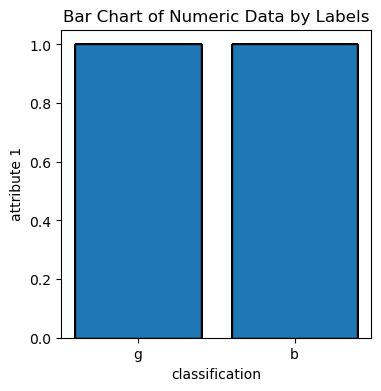

-----------------------------------------------------
ATTRIBUTE 2 Analysis:
-----------------------------------------------------
Value: 0.0, Count: 351, Percentage: %100.0

Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.0


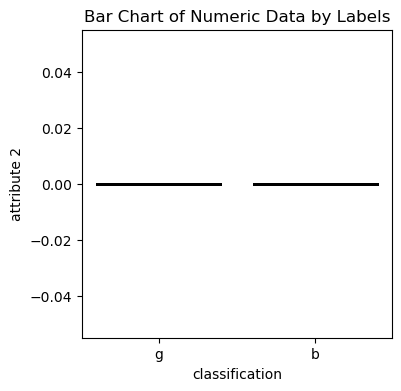

-----------------------------------------------------
ATTRIBUTE 3 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 15, Percentage: %4.27
Range: [-0.67935 - -0.47935], Count: 4, Percentage: %1.14
Range: [-0.26667 - -0.06667000000000001], Count: 2, Percentage: %0.57
Range: [-0.01864 - 0.18136000000000002], Count: 38, Percentage: %10.83
Range: [0.1859 - 0.3859], Count: 17, Percentage: %4.84
Range: [0.39179 - 0.59179], Count: 27, Percentage: %7.69
Range: [0.5984 - 0.7984], Count: 45, Percentage: %12.82
Range: [0.79847 - 0.99847], Count: 108, Percentage: %30.77
Range: [1.0 - 1.2], Count: 95, Percentage: %27.07

Mean: 0.6413418518518519
Median: 0.87111
Mode: 1.0
Standard Deviation: 0.49699871078010205


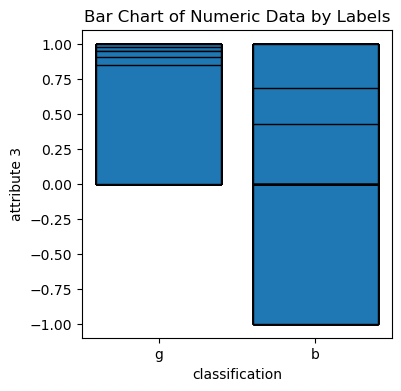

-----------------------------------------------------
ATTRIBUTE 4 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 27, Percentage: %7.69
Range: [-0.63636 - -0.43636], Count: 11, Percentage: %3.13
Range: [-0.41457 - -0.21456999999999998], Count: 12, Percentage: %3.42
Range: [-0.20685 - -0.006849999999999995], Count: 73, Percentage: %20.8
Range: [-0.00647 - 0.19353], Count: 140, Percentage: %39.89
Range: [0.19527 - 0.39527], Count: 40, Percentage: %11.4
Range: [0.4 - 0.6000000000000001], Count: 18, Percentage: %5.13
Range: [0.63548 - 0.83548], Count: 4, Percentage: %1.14
Range: [1.0 - 1.2], Count: 26, Percentage: %7.41

Mean: 0.04437188034188035
Median: 0.01631
Mode: 0.0
Standard Deviation: 0.44080550686951814


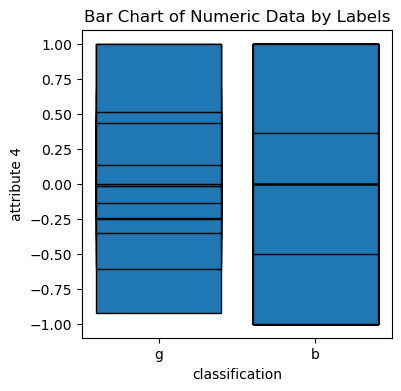

-----------------------------------------------------
ATTRIBUTE 5 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 16, Percentage: %4.56
Range: [-0.78824 - -0.5882400000000001], Count: 3, Percentage: %0.85
Range: [-0.50694 - -0.30693999999999994], Count: 4, Percentage: %1.14
Range: [-0.27303 - -0.07302999999999998], Count: 2, Percentage: %0.57
Range: [-0.04433 - 0.15567], Count: 48, Percentage: %13.68
Range: [0.1597 - 0.3597], Count: 10, Percentage: %2.85
Range: [0.367 - 0.567], Count: 23, Percentage: %6.55
Range: [0.58182 - 0.78182], Count: 58, Percentage: %16.52
Range: [0.79074 - 0.99074], Count: 85, Percentage: %24.22
Range: [0.9915 - 1.1915], Count: 102, Percentage: %29.06

Mean: 0.6010678917378918
Median: 0.8092
Mode: 1.0
Standard Deviation: 0.51912044174025


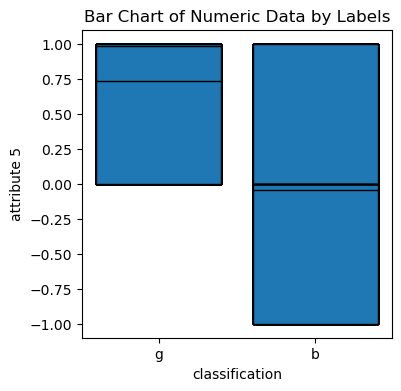

-----------------------------------------------------
ATTRIBUTE 6 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 24, Percentage: %6.84
Range: [-0.78509 - -0.5850899999999999], Count: 4, Percentage: %1.14
Range: [-0.45455 - -0.25455], Count: 4, Percentage: %1.14
Range: [-0.25346 - -0.05346000000000001], Count: 43, Percentage: %12.25
Range: [-0.05178 - 0.14822000000000002], Count: 150, Percentage: %42.74
Range: [0.15033 - 0.35033000000000003], Count: 40, Percentage: %11.4
Range: [0.35237 - 0.55237], Count: 24, Percentage: %6.84
Range: [0.55298 - 0.75298], Count: 23, Percentage: %6.55
Range: [0.75472 - 0.95472], Count: 13, Percentage: %3.7
Range: [1.0 - 1.2], Count: 26, Percentage: %7.41

Mean: 0.11588900284900285
Median: 0.0228
Mode: 0.0
Standard Deviation: 0.46015323610372066


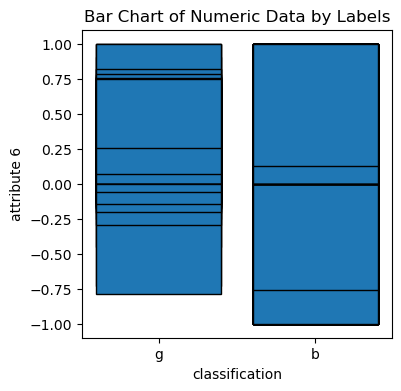

-----------------------------------------------------
ATTRIBUTE 7 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 13, Percentage: %3.7
Range: [-0.75693 - -0.5569299999999999], Count: 1, Percentage: %0.28
Range: [-0.39466 - -0.19466], Count: 5, Percentage: %1.42
Range: [-0.17778 - 0.022220000000000018], Count: 51, Percentage: %14.53
Range: [0.03759 - 0.23759000000000002], Count: 20, Percentage: %5.7
Range: [0.25 - 0.45], Count: 28, Percentage: %7.98
Range: [0.45217 - 0.65217], Count: 40, Percentage: %11.4
Range: [0.65829 - 0.85829], Count: 62, Percentage: %17.66
Range: [0.86098 - 1.06098], Count: 131, Percentage: %37.32

Mean: 0.5500950712250713
Median: 0.72873
Mode: 1.0
Standard Deviation: 0.49195148458124416


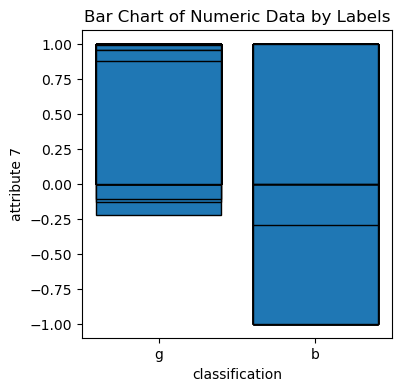

-----------------------------------------------------
ATTRIBUTE 8 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 31, Percentage: %8.83
Range: [-0.78502 - -0.5850200000000001], Count: 5, Percentage: %1.42
Range: [-0.58388 - -0.38387999999999994], Count: 5, Percentage: %1.42
Range: [-0.37708 - -0.17708000000000002], Count: 14, Percentage: %3.99
Range: [-0.17123 - 0.028770000000000018], Count: 135, Percentage: %38.46
Range: [0.03466 - 0.23466], Count: 48, Percentage: %13.68
Range: [0.23966 - 0.43966000000000005], Count: 25, Percentage: %7.12
Range: [0.45747 - 0.65747], Count: 20, Percentage: %5.7
Range: [0.67647 - 0.8764700000000001], Count: 25, Percentage: %7.12
Range: [0.87892 - 1.07892], Count: 43, Percentage: %12.25

Mean: 0.11936037037037038
Median: 0.01471
Mode: 0.0
Standard Deviation: 0.5200075576824547


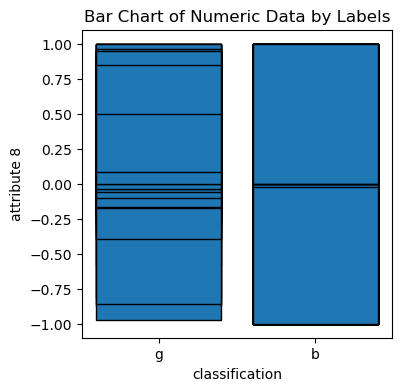

-----------------------------------------------------
ATTRIBUTE 9 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 13, Percentage: %3.7
Range: [-0.55941 - -0.35940999999999995], Count: 5, Percentage: %1.42
Range: [-0.33333 - -0.13333], Count: 14, Percentage: %3.99
Range: [-0.11108 - 0.08892000000000001], Count: 57, Percentage: %16.24
Range: [0.10991 - 0.30991], Count: 23, Percentage: %6.55
Range: [0.31889 - 0.5188900000000001], Count: 28, Percentage: %7.98
Range: [0.52632 - 0.7263200000000001], Count: 45, Percentage: %12.82
Range: [0.73196 - 0.9319600000000001], Count: 73, Percentage: %20.8
Range: [0.93582 - 1.13582], Count: 93, Percentage: %26.5

Mean: 0.5118480911680912
Median: 0.68421
Mode: 1.0
Standard Deviation: 0.506342696090129


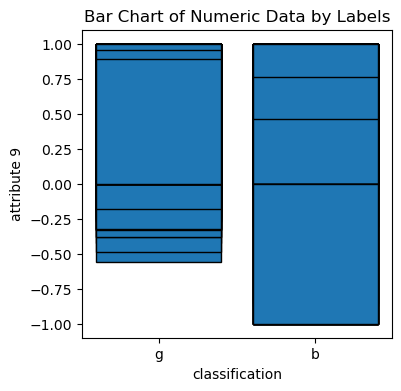

-----------------------------------------------------
ATTRIBUTE 10 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 17, Percentage: %4.84
Range: [-0.63427 - -0.43427], Count: 4, Percentage: %1.14
Range: [-0.43107 - -0.23107], Count: 16, Percentage: %4.56
Range: [-0.22222 - -0.02221999999999999], Count: 63, Percentage: %17.95
Range: [-0.02174 - 0.17826], Count: 124, Percentage: %35.33
Range: [0.18261 - 0.38261], Count: 28, Percentage: %7.98
Range: [0.41252 - 0.61252], Count: 17, Percentage: %4.84
Range: [0.63842 - 0.8384199999999999], Count: 25, Percentage: %7.12
Range: [0.84222 - 1.04222], Count: 57, Percentage: %16.24

Mean: 0.18134538461538463
Median: 0.01829
Mode: 0.0
Standard Deviation: 0.4831611503696893


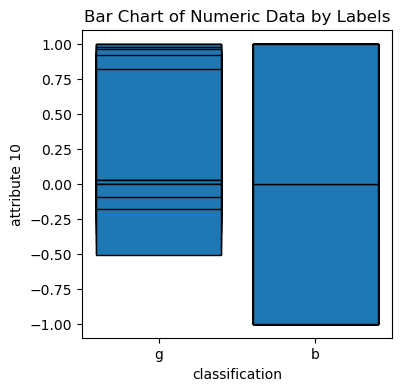

-----------------------------------------------------
ATTRIBUTE 11 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 16, Percentage: %4.56
Range: [-0.76229 - -0.56229], Count: 9, Percentage: %2.56
Range: [-0.55483 - -0.35483000000000003], Count: 11, Percentage: %3.13
Range: [-0.35148 - -0.15148], Count: 12, Percentage: %3.42
Range: [-0.13956 - 0.06044000000000002], Count: 46, Percentage: %13.11
Range: [0.06266 - 0.26266], Count: 13, Percentage: %3.7
Range: [0.26289 - 0.46289], Count: 28, Percentage: %7.98
Range: [0.47744 - 0.67744], Count: 42, Percentage: %11.97
Range: [0.67801 - 0.87801], Count: 46, Percentage: %13.11
Range: [0.88462 - 1.08462], Count: 128, Percentage: %36.47

Mean: 0.47618264957264955
Median: 0.66798
Mode: 1.0
Standard Deviation: 0.56269308800332


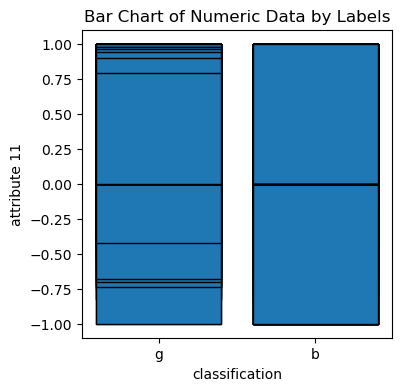

-----------------------------------------------------
ATTRIBUTE 12 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 20, Percentage: %5.7
Range: [-0.67743 - -0.47742999999999997], Count: 5, Percentage: %1.42
Range: [-0.43569 - -0.23569], Count: 24, Percentage: %6.84
Range: [-0.23518 - -0.03517999999999999], Count: 48, Percentage: %13.68
Range: [-0.0351 - 0.16490000000000002], Count: 127, Percentage: %36.18
Range: [0.19211 - 0.39211], Count: 27, Percentage: %7.69
Range: [0.39394 - 0.59394], Count: 23, Percentage: %6.55
Range: [0.59564 - 0.7956399999999999], Count: 18, Percentage: %5.13
Range: [0.79886 - 0.9988600000000001], Count: 30, Percentage: %8.55
Range: [1.0 - 1.2], Count: 29, Percentage: %8.26

Mean: 0.15504045584045584
Median: 0.02825
Mode: 0.0
Standard Deviation: 0.49411207823808645


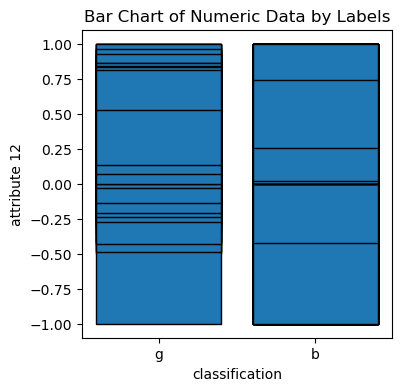

-----------------------------------------------------
ATTRIBUTE 13 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 26, Percentage: %7.41
Range: [-0.79657 - -0.59657], Count: 15, Percentage: %4.27
Range: [-0.57576 - -0.37576000000000004], Count: 10, Percentage: %2.85
Range: [-0.35558 - -0.15558], Count: 11, Percentage: %3.13
Range: [-0.09818 - 0.10182000000000001], Count: 51, Percentage: %14.53
Range: [0.10289 - 0.30289], Count: 21, Percentage: %5.98
Range: [0.30952 - 0.50952], Count: 21, Percentage: %5.98
Range: [0.51351 - 0.7135100000000001], Count: 35, Percentage: %9.97
Range: [0.71588 - 0.91588], Count: 58, Percentage: %16.52
Range: [0.92405 - 1.12405], Count: 103, Percentage: %29.34

Mean: 0.40080119658119656
Median: 0.64407
Mode: 1.0
Standard Deviation: 0.6212991868503486


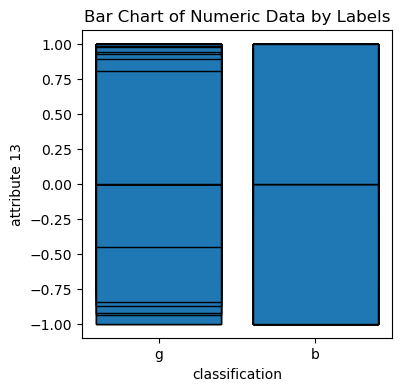

-----------------------------------------------------
ATTRIBUTE 14 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 29, Percentage: %8.26
Range: [-0.79313 - -0.5931299999999999], Count: 2, Percentage: %0.57
Range: [-0.59212 - -0.39211999999999997], Count: 14, Percentage: %3.99
Range: [-0.37965 - -0.17964999999999998], Count: 19, Percentage: %5.41
Range: [-0.16795 - 0.03205000000000002], Count: 113, Percentage: %32.19
Range: [0.03251 - 0.23251], Count: 65, Percentage: %18.52
Range: [0.24288 - 0.44288000000000005], Count: 26, Percentage: %7.41
Range: [0.44523 - 0.64523], Count: 31, Percentage: %8.83
Range: [0.66541 - 0.86541], Count: 21, Percentage: %5.98
Range: [0.87493 - 1.07493], Count: 31, Percentage: %8.83

Mean: 0.09341367521367522
Median: 0.03027
Mode: 0.0
Standard Deviation: 0.49416719123120856


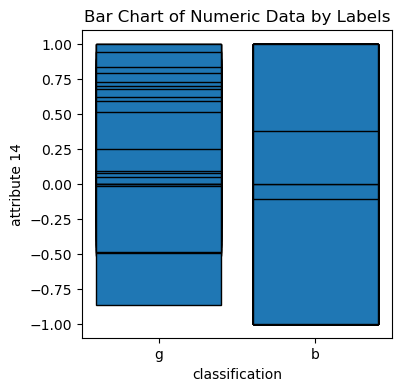

-----------------------------------------------------
ATTRIBUTE 15 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 37, Percentage: %10.54
Range: [-0.79085 - -0.5908500000000001], Count: 12, Percentage: %3.42
Range: [-0.57576 - -0.37576000000000004], Count: 11, Percentage: %3.13
Range: [-0.35737 - -0.15737], Count: 9, Percentage: %2.56
Range: [-0.1335 - 0.0665], Count: 62, Percentage: %17.66
Range: [0.08949 - 0.28949], Count: 11, Percentage: %3.13
Range: [0.29268 - 0.49268], Count: 15, Percentage: %4.27
Range: [0.50435 - 0.70435], Count: 40, Percentage: %11.4
Range: [0.70772 - 0.9077200000000001], Count: 58, Percentage: %16.52
Range: [0.90782 - 1.10782], Count: 96, Percentage: %27.35

Mean: 0.3441591452991453
Median: 0.60194
Mode: 1.0
Standard Deviation: 0.6518972147394285


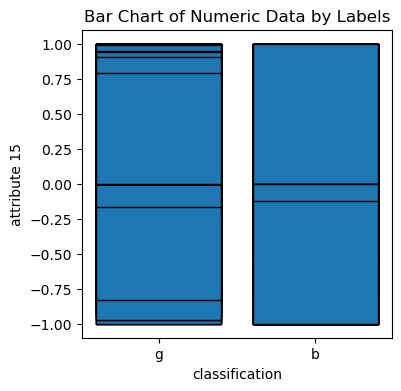

-----------------------------------------------------
ATTRIBUTE 16 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 22, Percentage: %6.27
Range: [-0.68065 - -0.48064999999999997], Count: 11, Percentage: %3.13
Range: [-0.46381 - -0.26381], Count: 18, Percentage: %5.13
Range: [-0.25527 - -0.055269999999999986], Count: 48, Percentage: %13.68
Range: [-0.0549 - 0.1451], Count: 141, Percentage: %40.17
Range: [0.14516 - 0.34516], Count: 29, Percentage: %8.26
Range: [0.34649 - 0.54649], Count: 26, Percentage: %7.41
Range: [0.54965 - 0.7496499999999999], Count: 20, Percentage: %5.7
Range: [0.77128 - 0.9712799999999999], Count: 17, Percentage: %4.84
Range: [1.0 - 1.2], Count: 19, Percentage: %5.41

Mean: 0.07113233618233618
Median: 0.0
Mode: 0.0
Standard Deviation: 0.45771725690186443


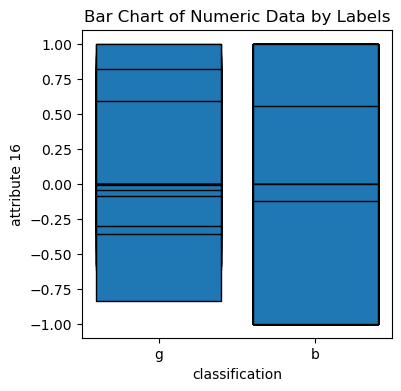

-----------------------------------------------------
ATTRIBUTE 17 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 24, Percentage: %6.84
Range: [-0.7894 - -0.5893999999999999], Count: 17, Percentage: %4.84
Range: [-0.58835 - -0.38835000000000003], Count: 10, Percentage: %2.85
Range: [-0.38391 - -0.18390999999999996], Count: 15, Percentage: %4.27
Range: [-0.17241 - 0.027590000000000003], Count: 46, Percentage: %13.11
Range: [0.047 - 0.247], Count: 16, Percentage: %4.56
Range: [0.28301 - 0.48301], Count: 24, Percentage: %6.84
Range: [0.48684 - 0.68684], Count: 43, Percentage: %12.25
Range: [0.6917 - 0.8916999999999999], Count: 58, Percentage: %16.52
Range: [0.8923 - 1.0923], Count: 98, Percentage: %27.92

Mean: 0.38194900284900285
Median: 0.59091
Mode: 1.0
Standard Deviation: 0.617139355390612


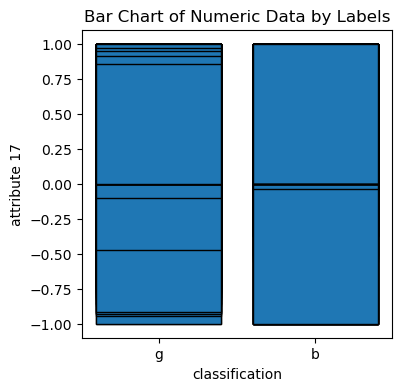

-----------------------------------------------------
ATTRIBUTE 18 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 29, Percentage: %8.26
Range: [-0.79603 - -0.5960300000000001], Count: 18, Percentage: %5.13
Range: [-0.58634 - -0.38633999999999996], Count: 15, Percentage: %4.27
Range: [-0.38606 - -0.18606], Count: 34, Percentage: %9.69
Range: [-0.18182 - 0.01818], Count: 105, Percentage: %29.91
Range: [0.01852 - 0.21852000000000002], Count: 67, Percentage: %19.09
Range: [0.235 - 0.435], Count: 21, Percentage: %5.98
Range: [0.45201 - 0.65201], Count: 18, Percentage: %5.13
Range: [0.65701 - 0.85701], Count: 21, Percentage: %5.98
Range: [0.87396 - 1.07396], Count: 23, Percentage: %6.55

Mean: -0.0036168091168091113
Median: 0.0
Mode: 0.0
Standard Deviation: 0.49605384036552447


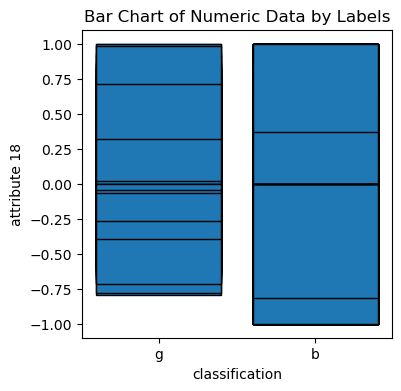

-----------------------------------------------------
ATTRIBUTE 19 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 27, Percentage: %7.69
Range: [-0.78768 - -0.58768], Count: 17, Percentage: %4.84
Range: [-0.56136 - -0.36135999999999996], Count: 13, Percentage: %3.7
Range: [-0.34773 - -0.14772999999999997], Count: 13, Percentage: %3.7
Range: [-0.12808 - 0.07192000000000001], Count: 44, Percentage: %12.54
Range: [0.0875 - 0.2875], Count: 16, Percentage: %4.56
Range: [0.29587 - 0.49587000000000003], Count: 29, Percentage: %8.26
Range: [0.5 - 0.7], Count: 48, Percentage: %13.68
Range: [0.70736 - 0.9073599999999999], Count: 60, Percentage: %17.09
Range: [0.90782 - 1.10782], Count: 84, Percentage: %23.93

Mean: 0.3593896011396011
Median: 0.57619
Mode: 1.0
Standard Deviation: 0.6253740554559709


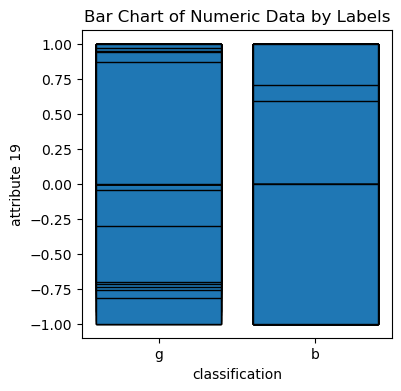

-----------------------------------------------------
ATTRIBUTE 20 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 40, Percentage: %11.4
Range: [-0.73641 - -0.53641], Count: 18, Percentage: %5.13
Range: [-0.50424 - -0.30424], Count: 22, Percentage: %6.27
Range: [-0.29052 - -0.09051999999999999], Count: 47, Percentage: %13.39
Range: [-0.08935 - 0.11065000000000001], Count: 130, Percentage: %37.04
Range: [0.11339 - 0.31339], Count: 22, Percentage: %6.27
Range: [0.31408 - 0.5140800000000001], Count: 13, Percentage: %3.7
Range: [0.5218 - 0.7218], Count: 19, Percentage: %5.41
Range: [0.7314 - 0.9314], Count: 15, Percentage: %4.27
Range: [0.95099 - 1.15099], Count: 25, Percentage: %7.12

Mean: -0.024024700854700848
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5183361397646937


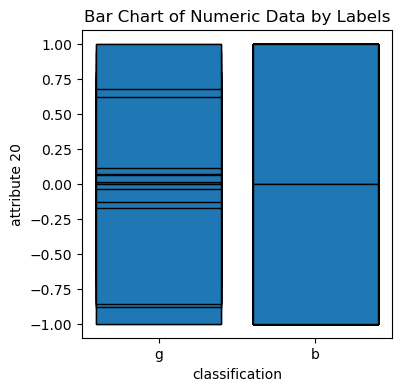

-----------------------------------------------------
ATTRIBUTE 21 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.78973 - -0.5897300000000001], Count: 14, Percentage: %3.99
Range: [-0.57695 - -0.37694999999999995], Count: 16, Percentage: %4.56
Range: [-0.36591 - -0.16591], Count: 16, Percentage: %4.56
Range: [-0.14815 - 0.05185000000000001], Count: 61, Percentage: %17.38
Range: [0.05982 - 0.25982], Count: 14, Percentage: %3.99
Range: [0.26829 - 0.46829], Count: 21, Percentage: %5.98
Range: [0.47222 - 0.67222], Count: 44, Percentage: %12.54
Range: [0.67463 - 0.87463], Count: 46, Percentage: %13.11
Range: [0.87605 - 1.07605], Count: 96, Percentage: %27.35

Mean: 0.33669547008547007
Median: 0.49909
Mode: 1.0
Standard Deviation: 0.6089590017354038


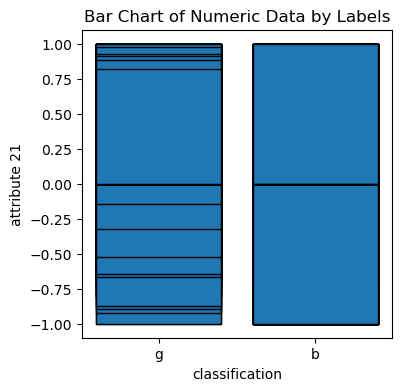

-----------------------------------------------------
ATTRIBUTE 22 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 32, Percentage: %9.12
Range: [-0.78699 - -0.5869899999999999], Count: 17, Percentage: %4.84
Range: [-0.57576 - -0.37576000000000004], Count: 18, Percentage: %5.13
Range: [-0.36364 - -0.16364], Count: 34, Percentage: %9.69
Range: [-0.16321 - 0.03679000000000002], Count: 108, Percentage: %30.77
Range: [0.03728 - 0.23728000000000002], Count: 59, Percentage: %16.81
Range: [0.24582 - 0.44582], Count: 15, Percentage: %4.27
Range: [0.44614 - 0.6461399999999999], Count: 18, Percentage: %5.13
Range: [0.65924 - 0.85924], Count: 17, Percentage: %4.84
Range: [0.89383 - 1.09383], Count: 33, Percentage: %9.4

Mean: 0.008295897435897431
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5174272322961273


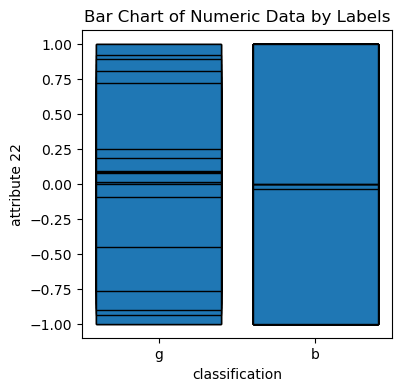

-----------------------------------------------------
ATTRIBUTE 23 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.79147 - -0.5914699999999999], Count: 12, Percentage: %3.42
Range: [-0.58315 - -0.38314999999999994], Count: 13, Percentage: %3.7
Range: [-0.37835 - -0.17835], Count: 18, Percentage: %5.13
Range: [-0.16667 - 0.03333], Count: 52, Percentage: %14.81
Range: [0.05136 - 0.25136000000000003], Count: 16, Percentage: %4.56
Range: [0.25616 - 0.45616], Count: 25, Percentage: %7.12
Range: [0.46241 - 0.6624099999999999], Count: 41, Percentage: %11.68
Range: [0.66403 - 0.8640300000000001], Count: 46, Percentage: %13.11
Range: [0.86441 - 1.06441], Count: 105, Percentage: %29.91

Mean: 0.36247549857549854
Median: 0.53176
Mode: 1.0
Standard Deviation: 0.6029068085365575


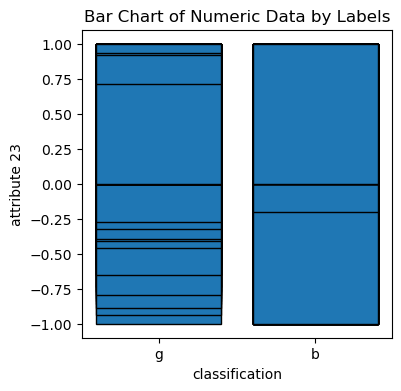

-----------------------------------------------------
ATTRIBUTE 24 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 41, Percentage: %11.68
Range: [-0.79753 - -0.5975299999999999], Count: 19, Percentage: %5.41
Range: [-0.59691 - -0.39691000000000004], Count: 22, Percentage: %6.27
Range: [-0.39458 - -0.19457999999999998], Count: 31, Percentage: %8.83
Range: [-0.19272 - 0.007280000000000009], Count: 93, Percentage: %26.5
Range: [0.00888 - 0.20888], Count: 63, Percentage: %17.95
Range: [0.21683 - 0.41683000000000003], Count: 26, Percentage: %7.41
Range: [0.4175 - 0.6174999999999999], Count: 13, Percentage: %3.7
Range: [0.62349 - 0.82349], Count: 16, Percentage: %4.56
Range: [0.82492 - 1.02492], Count: 27, Percentage: %7.69

Mean: -0.05740575498575498
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5267044205027489


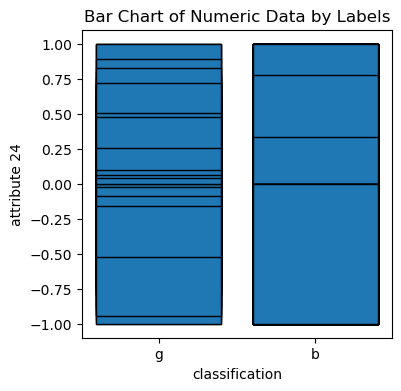

-----------------------------------------------------
ATTRIBUTE 25 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 21, Percentage: %5.98
Range: [-0.78334 - -0.58334], Count: 10, Percentage: %2.85
Range: [-0.58 - -0.37999999999999995], Count: 10, Percentage: %2.85
Range: [-0.37298 - -0.17297999999999997], Count: 10, Percentage: %2.85
Range: [-0.16489 - 0.03511], Count: 54, Percentage: %15.38
Range: [0.03513 - 0.23513], Count: 14, Percentage: %3.99
Range: [0.23693 - 0.43693000000000004], Count: 34, Percentage: %9.69
Range: [0.44483 - 0.64483], Count: 38, Percentage: %10.83
Range: [0.64628 - 0.8462799999999999], Count: 53, Percentage: %15.1
Range: [0.84906 - 1.04906], Count: 107, Percentage: %30.48

Mean: 0.39613467236467237
Median: 0.55389
Mode: 1.0
Standard Deviation: 0.577626295672421


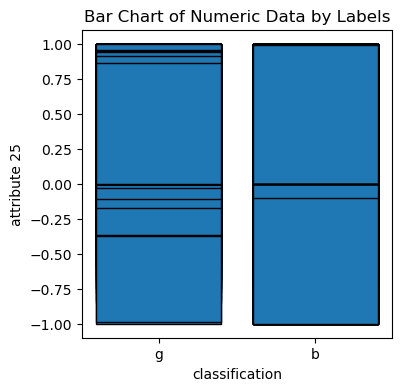

-----------------------------------------------------
ATTRIBUTE 26 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 41, Percentage: %11.68
Range: [-0.76904 - -0.56904], Count: 20, Percentage: %5.7
Range: [-0.5591 - -0.35910000000000003], Count: 24, Percentage: %6.84
Range: [-0.34838 - -0.14838], Count: 45, Percentage: %12.82
Range: [-0.14541 - 0.05459], Count: 109, Percentage: %31.05
Range: [0.05929 - 0.25929], Count: 46, Percentage: %13.11
Range: [0.26653 - 0.46653], Count: 16, Percentage: %4.56
Range: [0.5 - 0.7], Count: 18, Percentage: %5.13
Range: [0.70238 - 0.90238], Count: 12, Percentage: %3.42
Range: [0.90695 - 1.10695], Count: 20, Percentage: %5.7

Mean: -0.0711868660968661
Median: -0.01505
Mode: -1.0
Standard Deviation: 0.5077696325629779


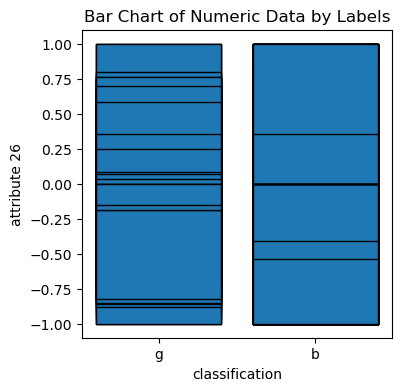

-----------------------------------------------------
ATTRIBUTE 27 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 10, Percentage: %2.85
Range: [-0.77097 - -0.57097], Count: 14, Percentage: %3.99
Range: [-0.46579 - -0.26578999999999997], Count: 6, Percentage: %1.71
Range: [-0.22839 - -0.02839], Count: 15, Percentage: %4.27
Range: [-0.02089 - 0.17911000000000002], Count: 29, Percentage: %8.26
Range: [0.18626 - 0.38626000000000005], Count: 28, Percentage: %7.98
Range: [0.39146 - 0.59146], Count: 48, Percentage: %13.68
Range: [0.59417 - 0.79417], Count: 45, Percentage: %12.82
Range: [0.79476 - 0.9947600000000001], Count: 66, Percentage: %18.8
Range: [0.99842 - 1.19842], Count: 90, Percentage: %25.64

Mean: 0.5416407977207977
Median: 0.70824
Mode: 1.0
Standard Deviation: 0.5154688066050549


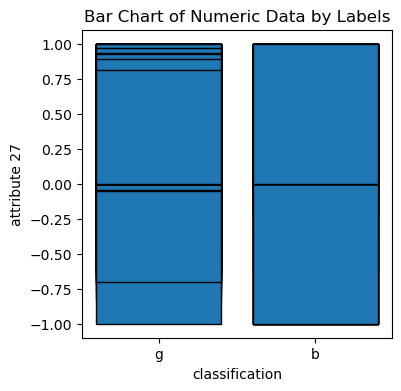

-----------------------------------------------------
ATTRIBUTE 28 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 51, Percentage: %14.53
Range: [-0.77986 - -0.57986], Count: 18, Percentage: %5.13
Range: [-0.57576 - -0.37576000000000004], Count: 23, Percentage: %6.55
Range: [-0.34586 - -0.14586], Count: 28, Percentage: %7.98
Range: [-0.14256 - 0.05744000000000002], Count: 107, Percentage: %30.48
Range: [0.06014 - 0.26014000000000004], Count: 54, Percentage: %15.38
Range: [0.26256 - 0.46256], Count: 16, Percentage: %4.56
Range: [0.482 - 0.6819999999999999], Count: 13, Percentage: %3.7
Range: [0.69129 - 0.8912899999999999], Count: 12, Percentage: %3.42
Range: [1.0 - 1.2], Count: 29, Percentage: %8.26

Mean: -0.06953760683760683
Median: -0.01769
Mode: -1.0
Standard Deviation: 0.5492411721804953


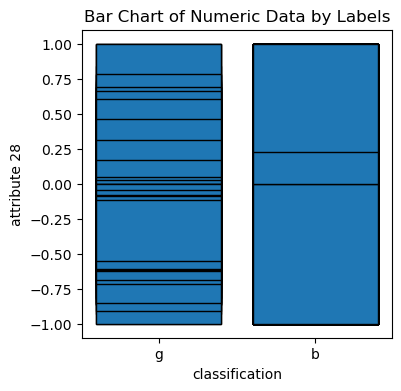

-----------------------------------------------------
ATTRIBUTE 29 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.75406 - -0.55406], Count: 11, Percentage: %3.13
Range: [-0.55147 - -0.35147], Count: 7, Percentage: %1.99
Range: [-0.33169 - -0.13168999999999997], Count: 12, Percentage: %3.42
Range: [-0.12879 - 0.07121000000000002], Count: 51, Percentage: %14.53
Range: [0.07497 - 0.27497], Count: 31, Percentage: %8.83
Range: [0.27657 - 0.47657], Count: 37, Percentage: %10.54
Range: [0.48348 - 0.6834800000000001], Count: 46, Percentage: %13.11
Range: [0.7107 - 0.9107000000000001], Count: 52, Percentage: %14.81
Range: [0.91165 - 1.11165], Count: 81, Percentage: %23.08

Mean: 0.37844518518518516
Median: 0.49664
Mode: 1.0
Standard Deviation: 0.575064623722799


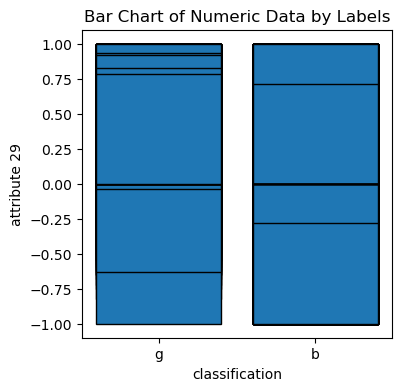

-----------------------------------------------------
ATTRIBUTE 30 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 37, Percentage: %10.54
Range: [-0.79141 - -0.59141], Count: 17, Percentage: %4.84
Range: [-0.57649 - -0.37648999999999994], Count: 17, Percentage: %4.84
Range: [-0.37088 - -0.17087999999999998], Count: 37, Percentage: %10.54
Range: [-0.16713 - 0.03287000000000001], Count: 112, Percentage: %31.91
Range: [0.03333 - 0.23333], Count: 52, Percentage: %14.81
Range: [0.2336 - 0.4336], Count: 20, Percentage: %5.7
Range: [0.45455 - 0.65455], Count: 20, Percentage: %5.7
Range: [0.65625 - 0.85625], Count: 12, Percentage: %3.42
Range: [0.86061 - 1.06061], Count: 27, Percentage: %7.69

Mean: -0.027907094017094014
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5072499728746162


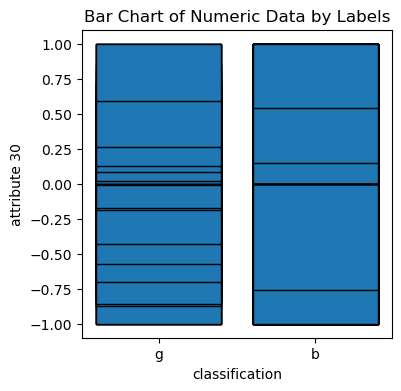

-----------------------------------------------------
ATTRIBUTE 31 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.75321 - -0.55321], Count: 8, Percentage: %2.28
Range: [-0.54891 - -0.34891], Count: 9, Percentage: %2.56
Range: [-0.34717 - -0.14716999999999997], Count: 13, Percentage: %3.7
Range: [-0.1359 - 0.06410000000000002], Count: 59, Percentage: %16.81
Range: [0.06927 - 0.26927], Count: 33, Percentage: %9.4
Range: [0.27869 - 0.47869], Count: 41, Percentage: %11.68
Range: [0.48927 - 0.68927], Count: 39, Percentage: %11.11
Range: [0.69635 - 0.89635], Count: 50, Percentage: %14.25
Range: [0.90409 - 1.10409], Count: 76, Percentage: %21.65

Mean: 0.3525137321937322
Median: 0.44277
Mode: 1.0
Standard Deviation: 0.5706687124079945


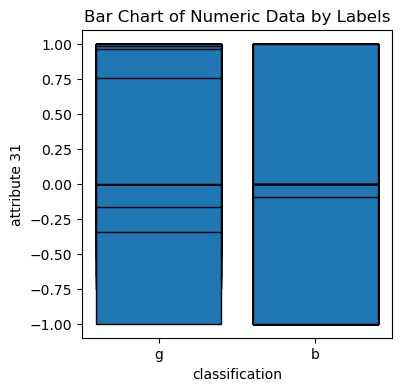

-----------------------------------------------------
ATTRIBUTE 32 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 33, Percentage: %9.4
Range: [-0.78555 - -0.58555], Count: 15, Percentage: %4.27
Range: [-0.57377 - -0.37377], Count: 17, Percentage: %4.84
Range: [-0.36765 - -0.16764999999999997], Count: 42, Percentage: %11.97
Range: [-0.15755 - 0.042450000000000015], Count: 113, Percentage: %32.19
Range: [0.05419 - 0.25419], Count: 55, Percentage: %15.67
Range: [0.25792 - 0.45792], Count: 14, Percentage: %3.99
Range: [0.47033 - 0.6703300000000001], Count: 20, Percentage: %5.7
Range: [0.70011 - 0.90011], Count: 12, Percentage: %3.42
Range: [0.90196 - 1.10196], Count: 30, Percentage: %8.55

Mean: -0.003793760683760677
Median: 0.0
Mode: 0.0
Standard Deviation: 0.512842251512933


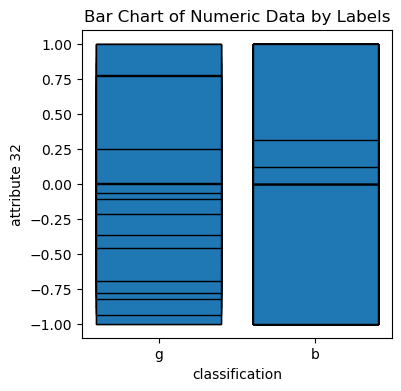

-----------------------------------------------------
ATTRIBUTE 33 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 15, Percentage: %4.27
Range: [-0.67699 - -0.47698999999999997], Count: 9, Percentage: %2.56
Range: [-0.47419 - -0.27419], Count: 10, Percentage: %2.85
Range: [-0.27339 - -0.07339000000000001], Count: 21, Percentage: %5.98
Range: [-0.06739 - 0.13261], Count: 79, Percentage: %22.51
Range: [0.13376 - 0.33376], Count: 28, Percentage: %7.98
Range: [0.33381 - 0.53381], Count: 41, Percentage: %11.68
Range: [0.54252 - 0.7425200000000001], Count: 42, Percentage: %11.97
Range: [0.74323 - 0.94323], Count: 46, Percentage: %13.11
Range: [0.95838 - 1.15838], Count: 60, Percentage: %17.09

Mean: 0.3493636467236467
Median: 0.40956
Mode: 0.0
Standard Deviation: 0.5219183070511462


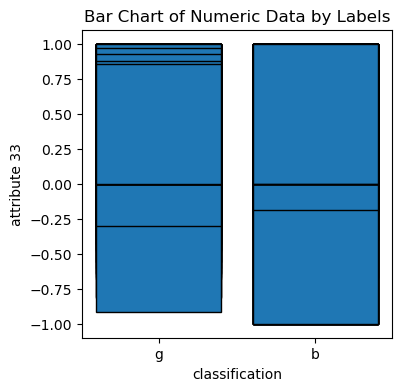

-----------------------------------------------------
ATTRIBUTE 34 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.76112 - -0.5611200000000001], Count: 17, Percentage: %4.84
Range: [-0.55837 - -0.35837], Count: 20, Percentage: %5.7
Range: [-0.35339 - -0.15338999999999997], Count: 30, Percentage: %8.55
Range: [-0.15143 - 0.04857], Count: 140, Percentage: %39.89
Range: [0.05394 - 0.25394], Count: 42, Percentage: %11.97
Range: [0.26092 - 0.46092], Count: 24, Percentage: %6.84
Range: [0.46301 - 0.66301], Count: 15, Percentage: %4.27
Range: [0.67739 - 0.8773900000000001], Count: 14, Percentage: %3.99
Range: [0.90196 - 1.10196], Count: 26, Percentage: %7.41

Mean: 0.014480113960113956
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4676696002265439


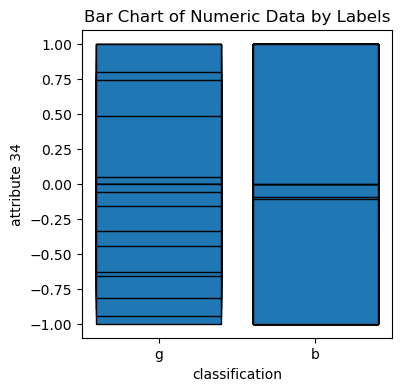

In [2]:
filename = "data/ionosphere.data"
ionosphere_dataKNN = readFileKNN(filename)

categories = []
for i in range(34):
    name = "attribute " + str(i+1)
    categories.append(name)
classifications = ["g", "b"]

ionosphereAnalysis = dataAnalysis(ionosphere_dataKNN,categories,classifications)
ionosphereAnalysis.printLabelStats()
ionosphereAnalysis.printCategoryStats()

### Dataset 2 (Adult Data Set):

Classification Analysis:
Total: 30162 (%100)
Value: >50K, Count: 7508, Percentage: %24.89
Value: <=50K, Count: 22654, Percentage: %75.11
Attribute Analysis:
-----------------------------------------------------
AGE Analysis (Count Ranges):
-----------------------------------------------------
Range: [17.0 - 24.3], Count: 4869, Percentage: %16.14
Range: [25.0 - 32.3], Count: 6368, Percentage: %21.11
Range: [33.0 - 40.3], Count: 6523, Percentage: %21.63
Range: [41.0 - 48.3], Count: 5580, Percentage: %18.5
Range: [49.0 - 56.3], Count: 3727, Percentage: %12.36
Range: [57.0 - 64.3], Count: 2120, Percentage: %7.03
Range: [65.0 - 72.3], Count: 685, Percentage: %2.27
Range: [73.0 - 80.3], Count: 215, Percentage: %0.71
Range: [81.0 - 88.3], Count: 40, Percentage: %0.13
Range: [90.0 - 97.3], Count: 35, Percentage: %0.12

Mean: 38.437901995888865
Median: 37.0
Mode: 36.0
Standard Deviation: 13.134447039742295


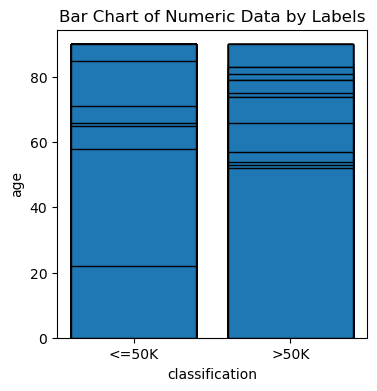

-----------------------------------------------------
WORKCLASS Analysis:
-----------------------------------------------------
Value: 0.0, Count: 22286, Percentage: %73.89
Value: 1.0, Count: 2499, Percentage: %8.29
Value: 2.0, Count: 1074, Percentage: %3.56
Value: 3.0, Count: 943, Percentage: %3.13
Value: 4.0, Count: 2067, Percentage: %6.85
Value: 5.0, Count: 1279, Percentage: %4.24
Value: 6.0, Count: 14, Percentage: %0.05

Mean: 0.7367880114050792
Median: 0.0
Mode: 0.0
Standard Deviation: 1.4618840471328831


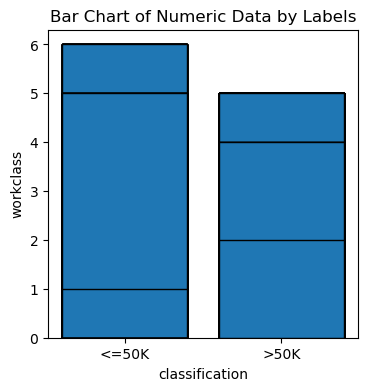

-----------------------------------------------------
FNLWGT Analysis (Count Ranges):
-----------------------------------------------------
Range: [13769.0 - 160862.6], Count: 12373, Percentage: %41.02
Range: [160893.0 - 307986.6], Count: 14007, Percentage: %46.44
Range: [308027.0 - 455120.6], Count: 3220, Percentage: %10.68
Range: [455361.0 - 602454.6], Count: 432, Percentage: %1.43
Range: [602513.0 - 749606.6], Count: 94, Percentage: %0.31
Range: [749636.0 - 896729.6], Count: 17, Percentage: %0.06
Range: [910398.0 - 1057491.6], Count: 9, Percentage: %0.03
Range: [1085515.0 - 1232608.6], Count: 6, Percentage: %0.02
Range: [1268339.0 - 1415432.6], Count: 2, Percentage: %0.01
Range: [1455435.0 - 1602528.6], Count: 2, Percentage: %0.01

Mean: 189793.83393011073
Median: 178425.0
Mode: 203488.0
Standard Deviation: 105651.220088839


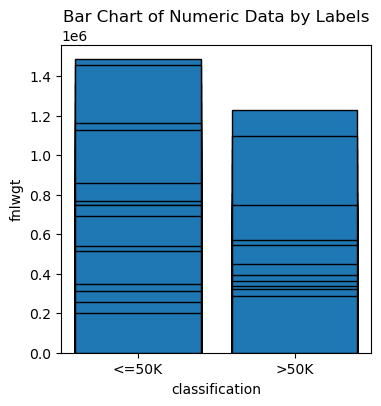

-----------------------------------------------------
EDUCATION Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.0 - 1.5], Count: 11722, Percentage: %38.86
Range: [2.0 - 3.5], Count: 10888, Percentage: %36.1
Range: [4.0 - 5.5], Count: 1550, Percentage: %5.14
Range: [6.0 - 7.5], Count: 1762, Percentage: %5.84
Range: [8.0 - 9.5], Count: 934, Percentage: %3.1
Range: [10.0 - 11.5], Count: 1778, Percentage: %5.89
Range: [12.0 - 13.5], Count: 1195, Percentage: %3.96
Range: [14.0 - 15.5], Count: 333, Percentage: %1.1

Mean: 3.3728201047675883
Median: 3.0
Mode: 3.0
Standard Deviation: 3.4293219813016265


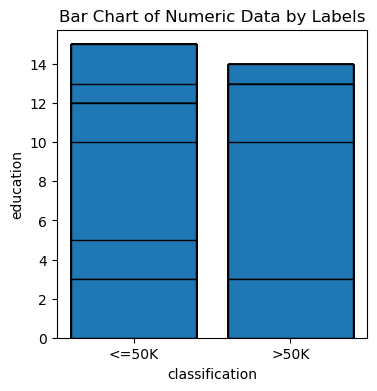

-----------------------------------------------------
EDUCATION-NUM Analysis (Count Ranges):
-----------------------------------------------------
Range: [1.0 - 2.5], Count: 196, Percentage: %0.65
Range: [3.0 - 4.5], Count: 845, Percentage: %2.8
Range: [5.0 - 6.5], Count: 1275, Percentage: %4.23
Range: [7.0 - 8.5], Count: 1425, Percentage: %4.72
Range: [9.0 - 10.5], Count: 16518, Percentage: %54.76
Range: [11.0 - 12.5], Count: 2315, Percentage: %7.68
Range: [13.0 - 14.5], Count: 6671, Percentage: %22.12
Range: [15.0 - 16.5], Count: 917, Percentage: %3.04

Mean: 10.12131158411246
Median: 10.0
Mode: 9.0
Standard Deviation: 2.5499526468579456


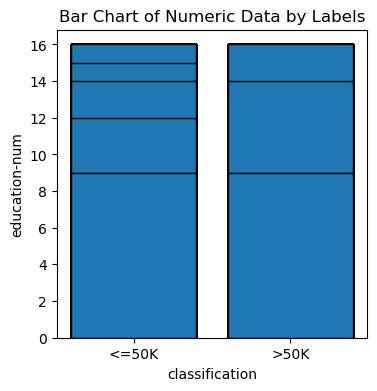

-----------------------------------------------------
MARITAL-STATUS Analysis:
-----------------------------------------------------
Value: 0.0, Count: 14065, Percentage: %46.63
Value: 1.0, Count: 4214, Percentage: %13.97
Value: 2.0, Count: 9726, Percentage: %32.25
Value: 3.0, Count: 939, Percentage: %3.11
Value: 4.0, Count: 827, Percentage: %2.74
Value: 5.0, Count: 370, Percentage: %1.23
Value: 6.0, Count: 21, Percentage: %0.07

Mean: 1.053212651680923
Median: 1.0
Mode: 0.0
Standard Deviation: 1.1708615797231667


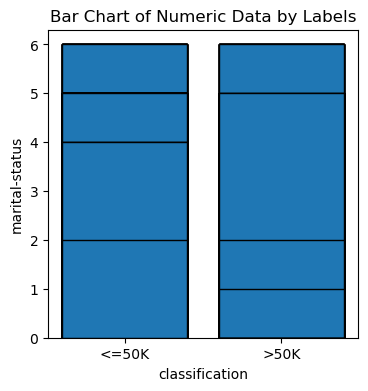

-----------------------------------------------------
OCCUPATION Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.0 - 1.3], Count: 4942, Percentage: %16.38
Range: [2.0 - 3.3], Count: 6796, Percentage: %22.53
Range: [4.0 - 5.3], Count: 8030, Percentage: %26.62
Range: [6.0 - 7.3], Count: 3316, Percentage: %10.99
Range: [8.0 - 9.3], Count: 4710, Percentage: %15.62
Range: [10.0 - 11.3], Count: 1715, Percentage: %5.69
Range: [12.0 - 13.3], Count: 653, Percentage: %2.16

Mean: 4.74215900802334
Median: 4.0
Mode: 5.0
Standard Deviation: 2.978704396570704


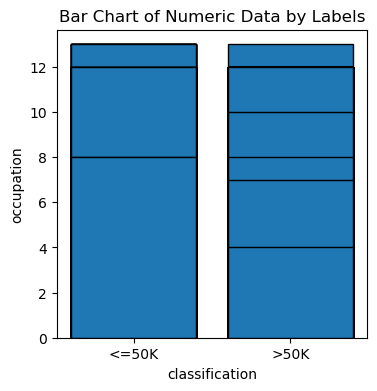

-----------------------------------------------------
RELATIONSHIP Analysis:
-----------------------------------------------------
Value: 0.0, Count: 1406, Percentage: %4.66
Value: 1.0, Count: 4466, Percentage: %14.81
Value: 2.0, Count: 12463, Percentage: %41.32
Value: 3.0, Count: 7726, Percentage: %25.62
Value: 4.0, Count: 889, Percentage: %2.95
Value: 5.0, Count: 3212, Percentage: %10.65

Mean: 2.3932763079371395
Median: 2.0
Mode: 2.0
Standard Deviation: 1.229769065834365


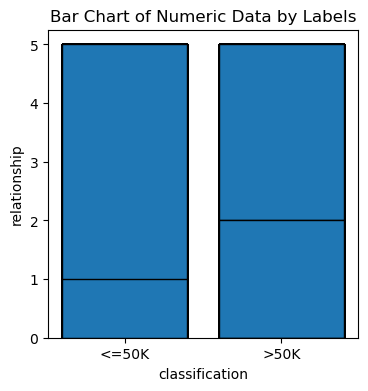

-----------------------------------------------------
RACE Analysis:
-----------------------------------------------------
Value: 0.0, Count: 25933, Percentage: %85.98
Value: 1.0, Count: 895, Percentage: %2.97
Value: 2.0, Count: 286, Percentage: %0.95
Value: 3.0, Count: 231, Percentage: %0.77
Value: 4.0, Count: 2817, Percentage: %9.34

Mean: 0.4451959419136662
Median: 0.0
Mode: 0.0
Standard Deviation: 1.196938008356543


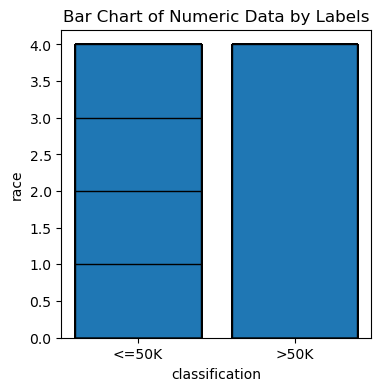

-----------------------------------------------------
SEX Analysis:
-----------------------------------------------------
Value: 0.0, Count: 9782, Percentage: %32.43
Value: 1.0, Count: 20380, Percentage: %67.57

Mean: 0.6756846362973278
Median: 1.0
Mode: 1.0
Standard Deviation: 0.46811847706438126


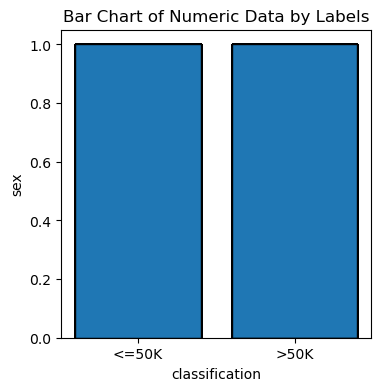

-----------------------------------------------------
CAPITAL-GAIN Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.0 - 9999.9], Count: 29430, Percentage: %97.57
Range: [10520.0 - 20519.9], Count: 533, Percentage: %1.77
Range: [22040.0 - 32039.9], Count: 46, Percentage: %0.15
Range: [34095.0 - 44094.9], Count: 5, Percentage: %0.02
Range: [99999.0 - 109998.9], Count: 148, Percentage: %0.49

Mean: 1092.0078575691268
Median: 0.0
Mode: 0.0
Standard Deviation: 7406.223719548601


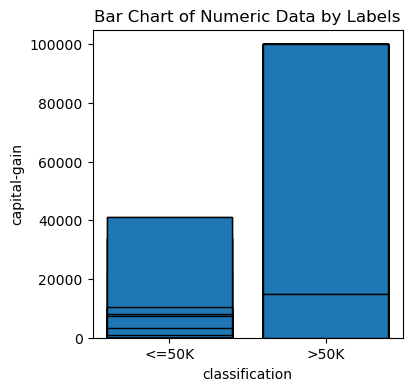

-----------------------------------------------------
CAPITAL-LOSS Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.0 - 435.6], Count: 28744, Percentage: %95.3
Range: [625.0 - 1060.6], Count: 25, Percentage: %0.08
Range: [1092.0 - 1527.6], Count: 107, Percentage: %0.35
Range: [1539.0 - 1974.6], Count: 806, Percentage: %2.67
Range: [1977.0 - 2412.6], Count: 382, Percentage: %1.27
Range: [2415.0 - 2850.6], Count: 90, Percentage: %0.3
Range: [3004.0 - 3439.6], Count: 1, Percentage: %0.0
Range: [3683.0 - 4118.6], Count: 6, Percentage: %0.02
Range: [4356.0 - 4791.6], Count: 1, Percentage: %0.0

Mean: 88.37248856176646
Median: 0.0
Mode: 0.0
Standard Deviation: 404.29166831606875


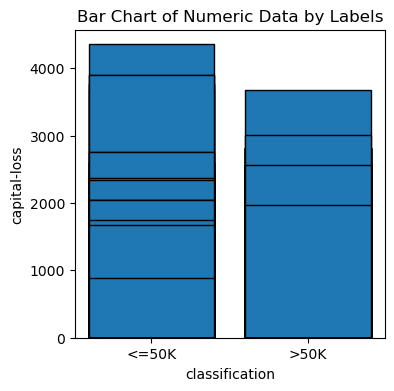

-----------------------------------------------------
HOURS-PER-WEEK Analysis (Count Ranges):
-----------------------------------------------------
Range: [1.0 - 10.8], Count: 511, Percentage: %1.69
Range: [11.0 - 20.8], Count: 1877, Percentage: %6.22
Range: [21.0 - 30.8], Count: 1995, Percentage: %6.61
Range: [31.0 - 40.8], Count: 16582, Percentage: %54.98
Range: [41.0 - 50.8], Count: 5722, Percentage: %18.97
Range: [51.0 - 60.8], Count: 2423, Percentage: %8.03
Range: [61.0 - 70.8], Count: 592, Percentage: %1.96
Range: [72.0 - 81.8], Count: 268, Percentage: %0.89
Range: [82.0 - 91.8], Count: 92, Percentage: %0.31
Range: [92.0 - 101.8], Count: 100, Percentage: %0.33

Mean: 40.93123798156621
Median: 40.0
Mode: 40.0
Standard Deviation: 11.979785633632552


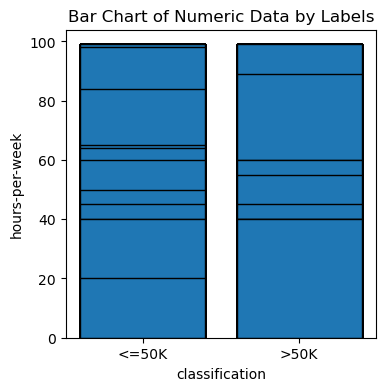

-----------------------------------------------------
NATIVE-COUNTRY Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.0 - 4.0], Count: 27824, Percentage: %92.25
Range: [5.0 - 9.0], Count: 330, Percentage: %1.09
Range: [10.0 - 14.0], Count: 285, Percentage: %0.94
Range: [15.0 - 19.0], Count: 456, Percentage: %1.51
Range: [20.0 - 24.0], Count: 762, Percentage: %2.53
Range: [25.0 - 29.0], Count: 184, Percentage: %0.61
Range: [30.0 - 34.0], Count: 137, Percentage: %0.45
Range: [35.0 - 39.0], Count: 183, Percentage: %0.61
Range: [40.0 - 44.0], Count: 1, Percentage: %0.0

Mean: 1.5155825210529805
Median: 0.0
Mode: 0.0
Standard Deviation: 5.640981672810041


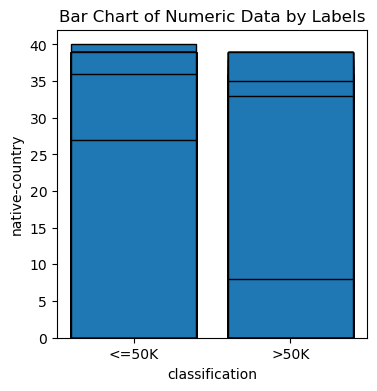

In [3]:
filename = "data/adult.data"
shortfilename = "data/Short_adult.data"
adult_dataKNN = readFileKNN(filename)
short_adult_dataKNN = readFileKNN(shortfilename)

categories = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', "native-country"]
classifications = [">50K", "<=50K"]

adultAnalysis = dataAnalysis(adult_dataKNN,categories,classifications)
adultAnalysis.printLabelStats()
adultAnalysis.printCategoryStats()

### Dataset 3 (Rice Data Set):

In [6]:
filename = "data/Rice_Cammeo_Osmancik.arffTemp.txt"
shortfilename = "data/Short_Rice_Cammeo_Osmancik.arffTemp.txt"

rice_dataKNN = readFileKNN(filename)
short_rice_dataKNN = readFileKNN(shortfilename)

categories = ["Area", "Perimeter", "Major_Axis_Length", "Minor_Axis_Length", "Eccentricity", "Convex_Area", "Extent" ]
classifications = ["Cammeo", "Osmancik"]


riceAnalysis = dataAnalysis(rice_dataKNN,categories,classifications)
riceAnalysis.printLabelStats()
riceAnalysis.printCategoryStats()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Rice_Cammeo_Osmancik.arffTemp.txt'

### Dataset 4 (Mushroom):

In [9]:
filename = "data/agaricus-lepiota.data"
mushroom_dataKNN = readFileKNN(filename)

shortfilename = "data/Short_agaricus-lepiota.data"
short_mushroom_dataKNN = readFileKNN(shortfilename)

categories = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
              "gill-size", "gill_color","stalk-shape","stalk-root", "stalk-surface-above-ring", 
              "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
              "veil-color", "ring-number", "ring-type", "spore-print-color", "population"]

classifications = ["poisonous", "edible"]

mushroomAnalysis = dataAnalysis(mushroom_dataKNN,categories,classifications)
mushroomAnalysis.printLabelStats()
mushroomAnalysis.printCategoryStats()

Classification Analysis:
Total: 5644 (%100)
Value: poisonous, Count: 0, Percentage: %0.0
Value: edible, Count: 0, Percentage: %0.0
Attribute Analysis:


ValueError: could not convert string to float: 'p'

## Task 2: Implement the models

#### 1. Implement logistic regression, and use (full batch) gradient descent for optimization.
#### 2. Implement k-Nearest Neighbor (KNN), and find the best K.

Implement both models as Python classes. You should use the constructor for the class to initialize the model
parameters as attributes, as well as to define other important properties of the model.
• Each of your models’ classes should have (at least) two functions:
– Define a fit function, which takes the training data (i.e., x and y)—as well as other hyperparameters (e.g.,
the learning rate and/or number of gradient descent iterations)—as input. This function should train your
model by modifying the model parameters.
– Define a predict function, which takes a set of input points (i.e., x) as input and outputs predictions (i.e.,
yˆ) for these points. Note that for linear regression you need to convert probabilities to binary 0-1
predictions by thresholding the output at 0.5!
In addition to the model classes, you should also define functions evaluate_acc to evaluate the model accuracy.
This function should take the true labels (i.e., y), and target labels (i.e., yˆ) as input, and it should output the accuracy
score.
• Lastly, you should implement a script to run k-fold cross-validation

### To see the model code go to Models.Py

### Logistic Regression:

### K-Nearest Neighbor (KNN):

To test all of the kNN models methods we will run the kFoldCross() method which utilizes, fit, predict, and evaluate_acc methods

In [7]:
ionosphere_model = kNN(3)
adult_model = kNN(3)
rice_model = kNN(3)
mushroom_model = kNN(3)

In [ ]:
ionosphere_model.kFoldCross(ionosphere_dataKNN,3)

In [ ]:
adult_model.kFoldCross(adult_dataKNN,3)

In [ ]:
rice_model.kFoldCross(rice_dataKNN,3)

In [ ]:
mushroom_model.kFoldCross(mushroom_dataKNN,3)

## Task 3: Run Experiments

The goal of this project is to have you explore linear classification and compare different features and models. Use
5-fold cross-validation to estimate performance in all of the experiments. Evaluate the performance using accuracy.
You are welcome to perform any experiments and analyses you see fit (e.g., to compare different features), but at a
minimum, you must complete the following experiments in the order stated below:

#### 1. Compare the accuracy of k-nearest neighbor and logistic regression on the four datasets.

#### 2. Test different k values for the k-nearest neighbor to find the best k-value by showing the accuracy plot. 

#### 3. Test different learning rates for gradient descent applied to logistic regression. Use a threshold for change in the value of the cost function as termination criteria and plot the accuracy on the train/validation set as a function of iterations of gradient descent.

#### 4. Compare the accuracy of the two models as a function of the size of the dataset (by controlling the training size)

Note: The above experiments are the minimum requirements that you must complete; however, this project is open-ended. For example, you might investigate different stopping criteria for gradient descent in logistic regression and develop an automated approach to select a good subset of features. You do not need to do all of these things, but you should demonstrate creativity, rigor, and an understanding of the course material in how you run your chosen experiments and how you report on them in your write-up.

#### Note: We used shotened versions of the datatsets to allow for faster processing of 5 Fold Cross Validation

In [ ]:
bestKValue(ionosphere_model,ionosphere_dataKNN)

In [ ]:
bestKValue(adult_model,short_adult_dataKNN)

In [ ]:
bestKValue(rice_model,short_rice_dataKNN)

In [8]:
bestKValue(mushroom_model,short_mushroom_dataKNN)

KeyboardInterrupt: 

In [ ]:
## Testing KNN logic w/ Dataset 1
# Just arbitrairly choosing k = 5 to start, and 70/30 training/test data distribution

len_training_data = int( len(ionosphere_data) * 0.7 )
print("Length of training data set:", len_training_data)
ionosphere_train = ionosphere_data[:len_training_data] # 0 to length of training data
ionosphere_test = ionosphere_data[len_training_data+1:] # should grab everything after what we want as training data

iono_knn = knn(5, ionosphere_train, ionosphere_test)
print("5 Nearest Neighbours for Ionosphere Data:")
print(iono_knn)